In [1]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib
from sklearn.preprocessing import StandardScaler

model = load_model('test_try.h5')
scaler = StandardScaler()

value = 18
test_data = ['4000', '4250', '4100', '4300', '4400', '4100', '4350', '4700',
             '4300', '6900', '6320', '6100', '5200', '5700', '5400', '5500',
             '5100', '4900']
test_data = np.array(test_data, dtype=float).reshape(-1, 1)
test_data_scaled = scaler.fit_transform(test_data)

def predict_next_10(last_three):
    save_predictions = []
    #print(last_three)
    for i in range(30):
        #print(last_three)
        array_sent = np.array(last_three)
        array_sent = array_sent.reshape(1,value,1)
        
        prediction = model.predict(array_sent)
        prediction_saved = prediction[0][0]
        last_three = np.append(last_three[1:], prediction_saved)
        save_predictions.append(prediction_saved)
    return(save_predictions)

predictions_further = predict_next_10(test_data_scaled)

predictions_further = np.array(predictions_further, dtype=float).reshape(-1, 1)
predictions_further = scaler.inverse_transform(predictions_further)
#print(predictions_further)



1/1 [==============================] - 0s 43ms/step


In [36]:
predictions_further[:10]

array([[4999.7565756 ],
       [4914.66020454],
       [4814.10820857],
       [4927.07333828],
       [4343.18415947],
       [4432.08765318],
       [4872.66979842],
       [5237.47599873],
       [4985.06299656],
       [4548.50454257]])

In [37]:
full_added = full_added.round()
full_added[:10]

array([[4000.],
       [4250.],
       [4100.],
       [4300.],
       [4400.],
       [4100.],
       [4350.],
       [4700.],
       [4300.],
       [6900.]])

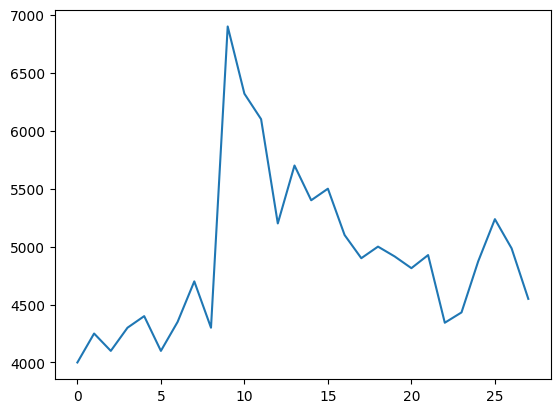

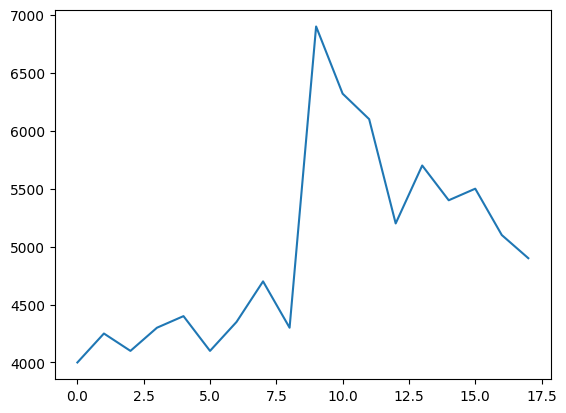

In [39]:
import matplotlib.pyplot as plt
plt.plot(full_added[:28])
plt.show()
plt.plot(test_data)
plt.show()